In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from IPython import display
import datetime
import time
from utils import *

from pix2pixhd import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# cities = ['la', 'bos', 'nyc', 'chi', 'sp', 'bue',
#           'joh', 'syd', 'tok', 'par', 'mex', 'sea', 'aus']

cities = ['nyc']
# dates = ['winter', 'spring', 'summer']
dates = ['summer']

zoom = 16
shadow_path = 'data/shadows/'
height_path = 'data/heights_new/'

# TILES_PER_CITY = 270
# BATCH_SIZE = 2

TILES_PER_CITY = 200
BATCH_SIZE = 1

In [7]:
# keep these images off train or test dataset
path_list = ['16/19305/24641.png', 
             '16/19317/24654.png', 
             '16/19348/24629.png', 
             '16/19301/24621.png', 
             '16/19331/24653.png', 
             '16/19311/24658.png', 
             '16/19306/24625.png',
             '16/19309/24670.png',
             '16/19294/24661.png',
             '16/19329/24624.png',
             '16/19333/24635.png',
             '16/19320/24627.png',
             '16/19302/24622.png',
             '16/19342/24644.png',
             '16/19302/24621.png',
             '16/19302/24645.png']

In [8]:
def store_images(checkpoint_name, path_list, deep_shadow):
    city, date, zoom = 'nyc', 'summer', 16

    if not os.path.exists('data/compare_models/%s/' % checkpoint_name):
        os.makedirs('data/compare_models/%s/' % checkpoint_name)

    for path in path_list:
        i, j = int(path.split('/')[1]), int(path.split('/')[2].split('.')[0])
        img_no = '%d_%d' % (i, j)
        plot_path = 'data/compare_models/%s/%s' % (checkpoint_name, img_no)
        test_on_image(deep_shadow.generator, height_path, shadow_path, city, date, zoom, i, j, path=plot_path, save=True)
        # test_on_image(deep_shadow.generator, height_path, shadow_path, city, date, zoom, i, j+1)

    return

In [9]:
train_dataset, test_dataset = get_train_test(
    height_path, shadow_path, cities, dates, zoom, TILES_PER_CITY, BATCH_SIZE, ignore_images = path_list)

[['data/heights_new/', 'data/shadows/', 'nyc', 'summer', '16/19335/24640.png', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True'], ['data/heights_new/', 'data/shadows/', 'nyc', 'summer', '16/19322/24600.png', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True'], ['data/heights_new/', 'data/shadows/', 'nyc', 'summer', '16/19311/24641.png', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True'], ['data/heights_new/', 'data/shadows/', 'nyc', 'summer', '16/19322/24641.png', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True'], ['data/heights_new/', 'data/shadows/', 'nyc', 'summer', '16/19313/24653.png', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True'], ['data/heights_new/', 'data/shadows/', 'nyc', 'summer', '16/19299/24644.png', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True', 'True'], ['data/heights_new/', 'data/shadows/', 'nyc', 'summer', '16/19260/24673.png', 'False', 'True'

In [10]:
lat, dat = False, False

In [11]:
checkpoint_name = 'pix2pix_hd'
checkpoint_path = 'training_checkpoints/%s' % (checkpoint_name)

In [12]:
pix2pix_hd = pix2pixHD(512, 512, None, None, lat, dat, loss_funcs=[l1_loss], type='pix2pixHD', attention=False, model_name = 'pix2pixHD')

Time taken for 1000 steps: 194.48 sec



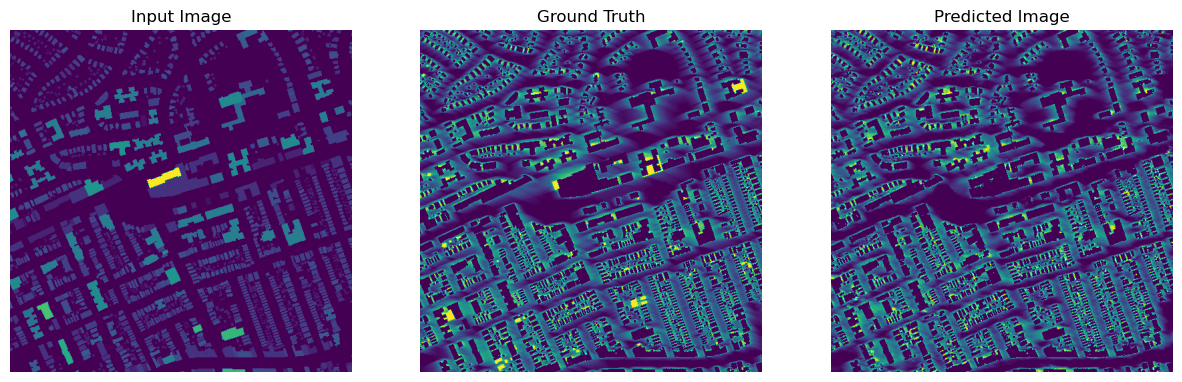

Step: 39k
fm_loss:  2.74312973
gan_loss:  5.28167248
total_disc_loss:  1.64008021
....................................................................................................

In [8]:
pix2pix_hd.fit(checkpoint_path, train_dataset, test_dataset, 40000)

In [12]:
store_images(checkpoint_name, path_list, pix2pix_hd)

In [13]:
df = pd.read_csv('data/compare_models/results.csv')
rmses, maes, mses, ssims, sobels = get_metrics(test_dataset, pix2pix_hd.generator, latitude=lat, date=dat)
df.loc[len(df.index)] = [checkpoint_name, np.average(maes), np.average(mses), np.average(rmses), np.average(ssims), np.average(sobels)] 
df.to_csv('data/compare_models/results.csv', index=False)

In [15]:
# pix2pix_hd.restore(checkpoint_path)
# for i, (test) in enumerate(test_dataset):
#     # print(i, test[0].shape, test[1].shape, test[2].shape, test[3].shape, test[4].shape)
#     generate_images(pix2pix_hd.generator, test[0], test[2], test[3],test[1], None, latitude=False, date=False, save=False)